**1. Installing required packages**


In [1]:
!pip install Bio

**2. Importing required libraries**

In [2]:
from Bio import Entrez
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pandas as pd

In [3]:
start_date = '2022/01/01'
end_date = '2022/01/01'
'{}:{}[EDAT]+open+access[filter]'.format(start_date, end_date)

'2022/01/01:2022/01/01[EDAT]+open+access[filter]'

**3. Extracting record from pubmed**

In [4]:
def count_extraction(start_date, end_date):
  # Specify the dates to retrieve research papers from PubMed
  # start_date = '2023/04/04'
  # end_date = '2023/04/04'

  # Provide your email address for Entrez API request
  Entrez.email = 'sbdesai2@illinois.edu'

  # Use Entrez to fetch the count of research papers added to PubMed based on dates
  # handle = Entrez.esearch(db='pubmed', term='{}:{}[EDAT]'.format(start_date, end_date))
  handle = Entrez.esearch(db='pmc', term='{}:{}[EDate]+open+access[filter]'.format(start_date, end_date))

  record = Entrez.read(handle)
  count = int(record['Count'])
  return count


# Define the start and end dates for the year 2022
start_date = datetime.date(2021, 1, 1)
end_date = datetime.date(2022, 12, 31)

# Generate a list of dates for the year 2022
date_list = [(start_date + datetime.timedelta(days=i)).strftime('%Y/%m/%d') for i in range((end_date - start_date).days + 1)]
count_list = []
# Print the list of dates
for date in date_list:
    count_list.append(count_extraction(date,date))

entrez_addition_df = pd.DataFrame(zip(date_list, count_list), columns = ['Date', 'Count'])

In [5]:
# entrez_addition_df = pd.read_csv("/content/output.csv")
# Convert 'Date' column to datetime
entrez_addition_df['Date'] = pd.to_datetime(entrez_addition_df['Date'])

# Extract day name and day number
entrez_addition_df['Day_Name'] = entrez_addition_df['Date'].dt.strftime('%A')  # Extract day name
entrez_addition_df['Day_Number'] = entrez_addition_df['Date'].dt.day          # Extract day number
entrez_addition_df['Year'] = entrez_addition_df['Date'].dt.year 

In [7]:
entrez_addition_df.to_csv("../data/pilot_study_output.csv")

In [8]:
# Get the list of unnamed columns
unnamed_columns = entrez_addition_df.columns[entrez_addition_df.columns.str.contains('Unnamed')].tolist()

# Drop the unnamed columns
entrez_addition_df = entrez_addition_df.drop(columns=unnamed_columns)

entrez_addition_df

,Date,Count,Day_Name,Day_Number,Year
0,2021-01-01,2081,Friday,1,2021
1,2021-01-02,246,Saturday,2,2021
2,2021-01-03,13,Sunday,3,2021
3,2021-01-04,16,Monday,4,2021
4,2021-01-05,1900,Tuesday,5,2021
...,...,...,...,...,...
725,2022-12-27,984,Tuesday,27,2022
726,2022-12-28,2468,Wednesday,28,2022
727,2022-12-29,2835,Thursday,29,2022
728,2022-12-30,1574,Friday,30,2022


**4. Plotting the count of research papers added to pubmed based on the Entrez date**

In [9]:
filtered_df = entrez_addition_df[entrez_addition_df['Day_Name'].isin(['Sunday', 'Monday', 'Tuesday'])]
df = filtered_df[filtered_df['Year'] == 2022]
n = 3
skip = 18
groups = []
for i in range(0, len(df), n + skip):
    groups.append(df.iloc[i:i+n])
print(groups[0])

          Date  Count Day_Name  Day_Number  Year
366 2022-01-02     14   Sunday           2  2022
367 2022-01-03     18   Monday           3  2022
368 2022-01-04   1975  Tuesday           4  2022


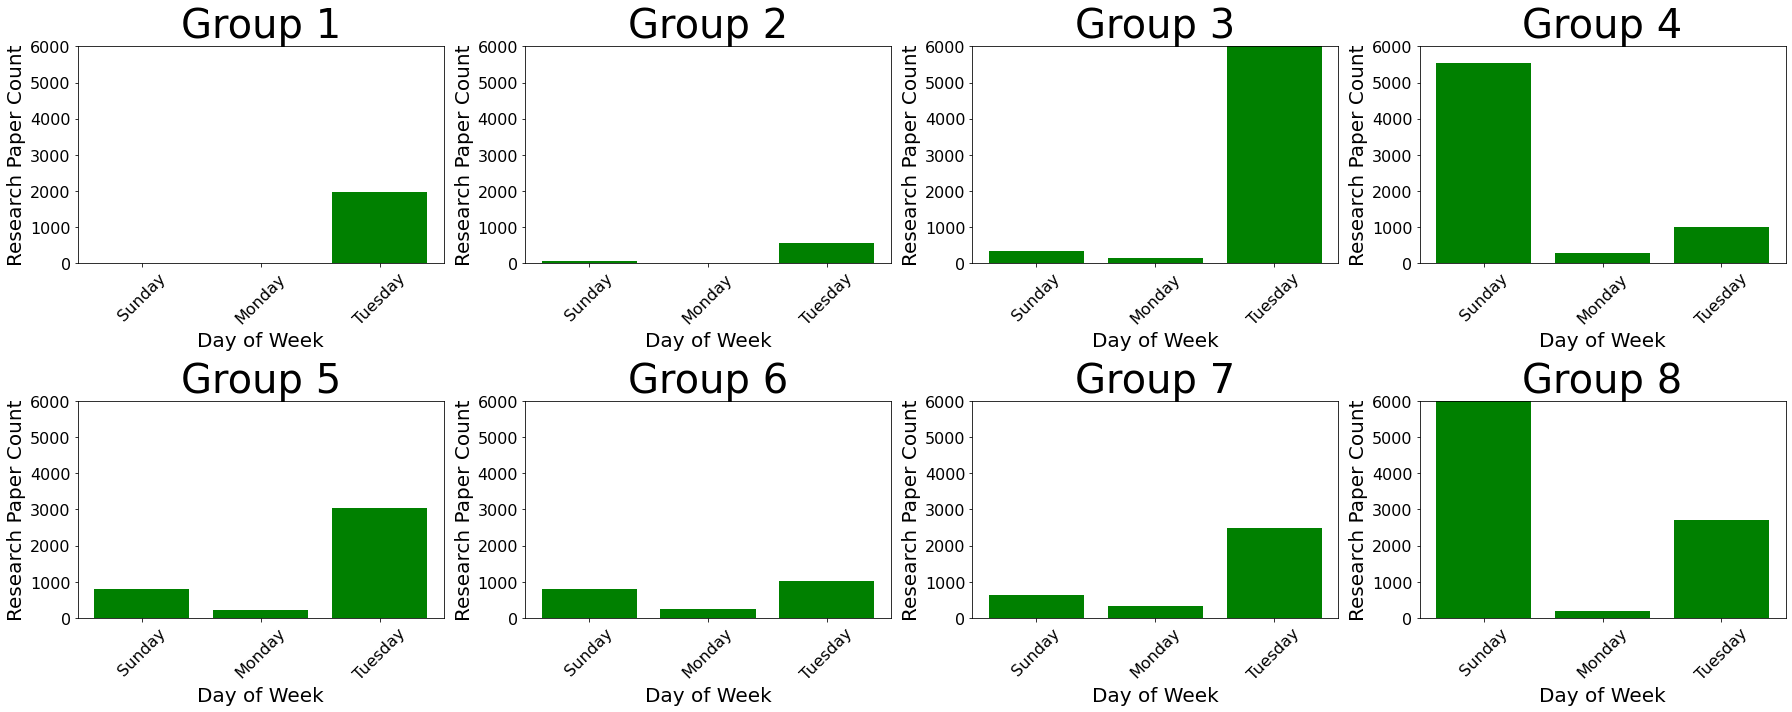

In [15]:
# Create subplots
fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize=(25, 10))
ind = 0
for row in axs:
    for ax in row:
        ax.set_ylim(0, 6000)
        # Create a plot in the current subplot
        ax.bar(groups[ind]['Day_Name'], groups[ind]['Count'], label=f'Group {ind}', linewidth = 5, color = 'green')
        ax.set_title(f'Group {ind+1}', fontsize = 40)  # Set subplot title
        
        # Add legend and labels
        ax.set_xlabel('Day of Week', fontsize = 20)
        ax.set_ylabel('Research Paper Count', fontsize = 20)
        ax.tick_params(axis = 'x', labelsize = 16, rotation = 45)
        ax.tick_params(axis = 'y', labelsize = 16)
        ind+=1

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('../data/pilot_study_viz')
# Show the plot